<a href="https://colab.research.google.com/github/Lauratxb/Lauratxb/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [15]:
from google.colab import files
uploaded= files.upload()

Saving listings.csv.gz to listings.csv.gz


In [70]:
from google.colab import files
uploaded= files.upload()

Saving reviews.csv.gz to reviews.csv (1).gz


In [71]:
reviews_df=pd.read_csv('/content/reviews.csv.gz')
listings_df=pd.read_csv('/content/listings.csv.gz')

In [72]:
print(reviews_df.head())
print(listings_df.head())

   listing_id        id        date  reviewer_id reviewer_name  \
0     2992450  15066586  2014-07-01     16827297       Kristen   
1     2992450  21810844  2014-10-24     22648856   Christopher   
2     2992450  27434334  2015-03-04        45406         Altay   
3     2992450  28524578  2015-03-25      5485362          John   
4     2992450  35913434  2015-06-23     15772025      Jennifer   

                                            comments  
0  Large apartment; nice kitchen and bathroom. Ke...  
1  This may be a little late, but just to say Ken...  
2  The apartment was very clean and convenient to...  
3  Kenneth was ready when I got there and arrange...  
4  We were pleased to see how 2nd Street and the ...  
        id                           listing_url       scrape_id last_scraped  \
0  2992450  https://www.airbnb.com/rooms/2992450  20240905032005   2024-09-05   
1  3820211  https://www.airbnb.com/rooms/3820211  20240905032005   2024-09-05   
2  5651579  https://www.airbnb

In [73]:
reviews_df.dropna(subset=['comments'], inplace=True)

In [74]:
reviews_df.drop_duplicates(subset=['reviewer_id', 'listing_id'], inplace=True)

In [83]:
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [84]:
reviews_df['sentiment'] = reviews_df['comments'].apply(analyze_sentiment)

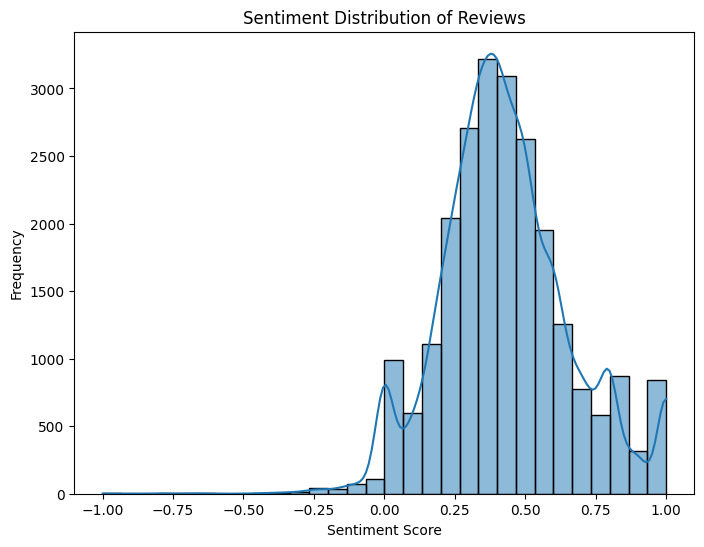

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [86]:
merged_df = pd.merge(reviews_df, listings_df, left_on='listing_id', right_on='id')

In [89]:
merged_df['price'] = merged_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [90]:
correlation_matrix = merged_df[['sentiment', 'price', 'review_scores_rating', 'number_of_reviews']].corr()

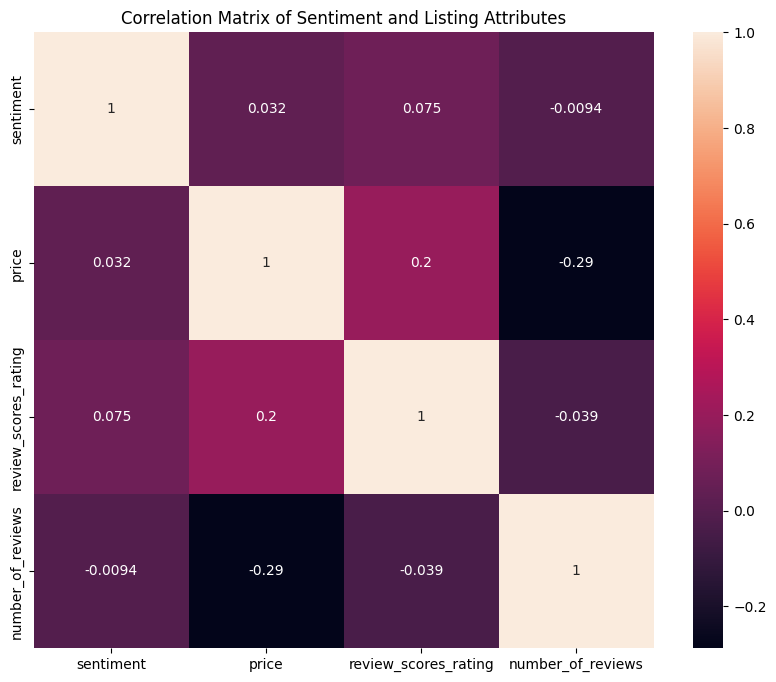

In [92]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Sentiment and Listing Attributes')
plt.show()